### Step 0: Setting up for the project

In [1]:
# pakages
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import openai

### Step 1: Call the prompt files from the prompt folder(complete_prompt_text)

In [2]:
# type all the prompts you need
# type "stop" to finish type the prompts
pmpt_lst = []
pmpt_count = 0

print("Type \"stop\" to stop putting your text files.")

flist = os.listdir(r'___your__"Prompt_Files"__location___') # find your "Prompt_Files" folder path(location) and put it here
print("File list:")
print(flist)

while True:
  pmpt = input()
  if pmpt == "stop":
    break
  elif pmpt not in flist:
    print("File not found")
  else:
    pmpt_lst.append(pmpt)
    pmpt_count += 1

Type "stop" to stop putting your text files.
File list:
['employment.txt', 'shoes.txt', 'testing.txt']


In [6]:
# assmeble all the prompt files to "complete_prompt_text"
num = 0
complete_prompt_text = ""

while num < pmpt_count:
  with open("___your__\"Prompt_Files\"__location___" + pmpt_lst[num], encoding='utf8') as kb_text: # put the same path here and add '\'
    prompt_text = kb_text.read()                                                                   # add extra '\' next to all the '\' so the code can recognize the path properly
    complete_prompt_text += prompt_text
    num += 1

### Step 2: Assemble the instruction text file and the prompt text files(complete_text)

In [7]:
# add the instructions to "complete_prompt_text"
with open(r"___your__\"Instruction.txt\"__location___") as instructions: # find your "Instruction.txt" file path and put it here
  instructions_text = instructions.read()

complete_text = instructions_text + complete_prompt_text

In [8]:
# This is the final text which will be passed to OpenAI
complete_text

'Given a prompt, extrapolate as many relationships as possible from it and provide a list of updates.\n\nIf an update is a relationship, provide ENTITY 1, RELATIONSHIP, ENTITY 2. The relationship is directed, so the order matters.\n\nExample: prompt: Sun is source of solar energy. It is also source of Vitamin D. updates: "Sun", "source of", "solar energy", "Sun","source of", "Vitamin D"\n\nComma is essential.\n\nJust give me those relationships without numberings.\n\nGive me exactly three objects per a relationship.\n\nGive me many relationships as you can.\n\nIf you see commas in the object, make them split into multiple relationships.\n\nNever leave two new line characters.\n\nIf you see the pronoun, you should guess it.\n\nHere is my prompt.Equal Employment Opportunity\nEqual Opportunity is the expressed policy of SmithCo. Our policy is to select the best-qualified person for each position in the organization and to conduct all business relationships without prejudice. SmithCo is co

### Step 3: Put "complete_text" file into OpenAI and get the relationships

In [11]:
# interacting with OpenAI
# Extract relationships from OpenAI
from openai import OpenAI

client = OpenAI(
    api_key='___your__OpenAI__API__keys___', # get your OpenAI API key and put it here
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        max_tokens=4096,
        n=1,
        temperature=0.5,
    )
    return response.choices[0].message.content.strip()

if __name__ == "__main__":
    user_input = complete_text
    response = chat_gpt(user_input)
    print(response)

"Equal Opportunity", "policy of", "SmithCo"
"SmithCo", "selects", "best-qualified person"
"SmithCo", "conducts", "business relationships"
"SmithCo", "committed to", "equal employment opportunity"
"SmithCo", "committed to", "employees"
"SmithCo", "committed to", "applicants"
"SmithCo", "makes", "employment decisions"
"SmithCo", "makes", "advancement opportunities"
"SmithCo", "makes", "employment decisions"
"SmithCo", "makes", "advancement opportunities"
"SmithCo", "regards", "race"
"SmithCo", "regards", "creed"
"SmithCo", "regards", "color"
"SmithCo", "regards", "religion"
"SmithCo", "regards", "sex"
"SmithCo", "regards", "national origin"
"SmithCo", "regards", "ancestry"
"SmithCo", "regards", "age"
"SmithCo", "regards", "physical handicap"
"SmithCo", "regards", "mental handicap"
"SmithCo", "regards", "veteran status"
"SmithCo", "regards", "military status"
"SmithCo", "regards", "protected characteristic"
"Managers", "seek out", "diverse pool"
"Managers", "make", "hiring decisions"
"Smi

### Step 4: Process the response from OpenAI

In [12]:
# processing OpenAI's text response
edit1 = response.replace("\n", ", ")
edit2 = edit1.replace('\"', '')
edit3 = edit2.replace(" , ", ' ')
edit4 = edit3.replace("  ", ', ')
edit5 = edit4.lower()
edit6 = edit5.replace(",,", ',')
processed = edit6 + ","
processed

'equal opportunity, policy of, smithco, smithco, selects, best-qualified person, smithco, conducts, business relationships, smithco, committed to, equal employment opportunity, smithco, committed to, employees, smithco, committed to, applicants, smithco, makes, employment decisions, smithco, makes, advancement opportunities, smithco, makes, employment decisions, smithco, makes, advancement opportunities, smithco, regards, race, smithco, regards, creed, smithco, regards, color, smithco, regards, religion, smithco, regards, sex, smithco, regards, national origin, smithco, regards, ancestry, smithco, regards, age, smithco, regards, physical handicap, smithco, regards, mental handicap, smithco, regards, veteran status, smithco, regards, military status, smithco, regards, protected characteristic, managers, seek out, diverse pool, managers, make, hiring decisions, smithco, develops, affirmative action program, affirmative action program, is, federal requirement, smithco, is, government cont

In [13]:
# put all the keywords in the processed text into the list
all_key_words = []

accum_char = 0
save_char = 0

while accum_char < len(processed):
  if processed[accum_char] == ",":
     all_key_words.append(processed[save_char:accum_char])
     save_char = accum_char + 2
     accum_char = save_char
  else:
     accum_char += 1

In [14]:
# separate the list above into three lists
entity1  = []
relation = []
entity2  = []

for i in range(len(all_key_words)):
  if i % 3 == 0:
    entity1.append(all_key_words[i])
  elif i % 3 == 1:
    relation.append(all_key_words[i])
  else:
    entity2.append(all_key_words[i])

In [15]:
# check if it works properly
print(len(all_key_words))
print(len(entity1))
print(len(relation))
print(len(entity2))

252
84
84
84


### Step 5: Convert three lists into dataframe, then genearte csv file and save it in the folder

In [16]:
# convert lists into dataframes
df1 = pd.DataFrame(entity1, columns = ['Entity1'])
df2 = pd.DataFrame(relation, columns = ['Relation'])
df3 = pd.DataFrame(entity2, columns = ['Entity2'])

relationships = pd.concat([df1, df2, df3], axis=1)

In [17]:
# the final version of the relationship dataframe
relationships

,Entity1,Relation,Entity2
0,equal opportunity,policy of,smithco
1,smithco,selects,best-qualified person
2,smithco,conducts,business relationships
3,smithco,committed to,equal employment opportunity
4,smithco,committed to,employees
...,...,...,...
79,materials,flow to,end of supply chain
80,customer behaviour,influences,supply chain
81,supply chain processes,co-ordinated to,focus on customer behaviour
82,customer responsiveness,confirms,material flow


In [19]:
# convert the dataframe to csv file and save it to the folder
relationships.to_csv(r'___your__"Relationships.csv"__location') # find your "Relationships.csv" file path and put it here

### Step 6: Draw the KG graph based on the dataframe, and save the image file of the graph

In [20]:
# Make dataframe for kg graph
KG_graph = pd.DataFrame({'entity1': entity1, 'entity2': entity2, 'edge': relation})
rel_labels = dict(zip(zip(KG_graph.entity1, KG_graph.entity2), KG_graph.edge))

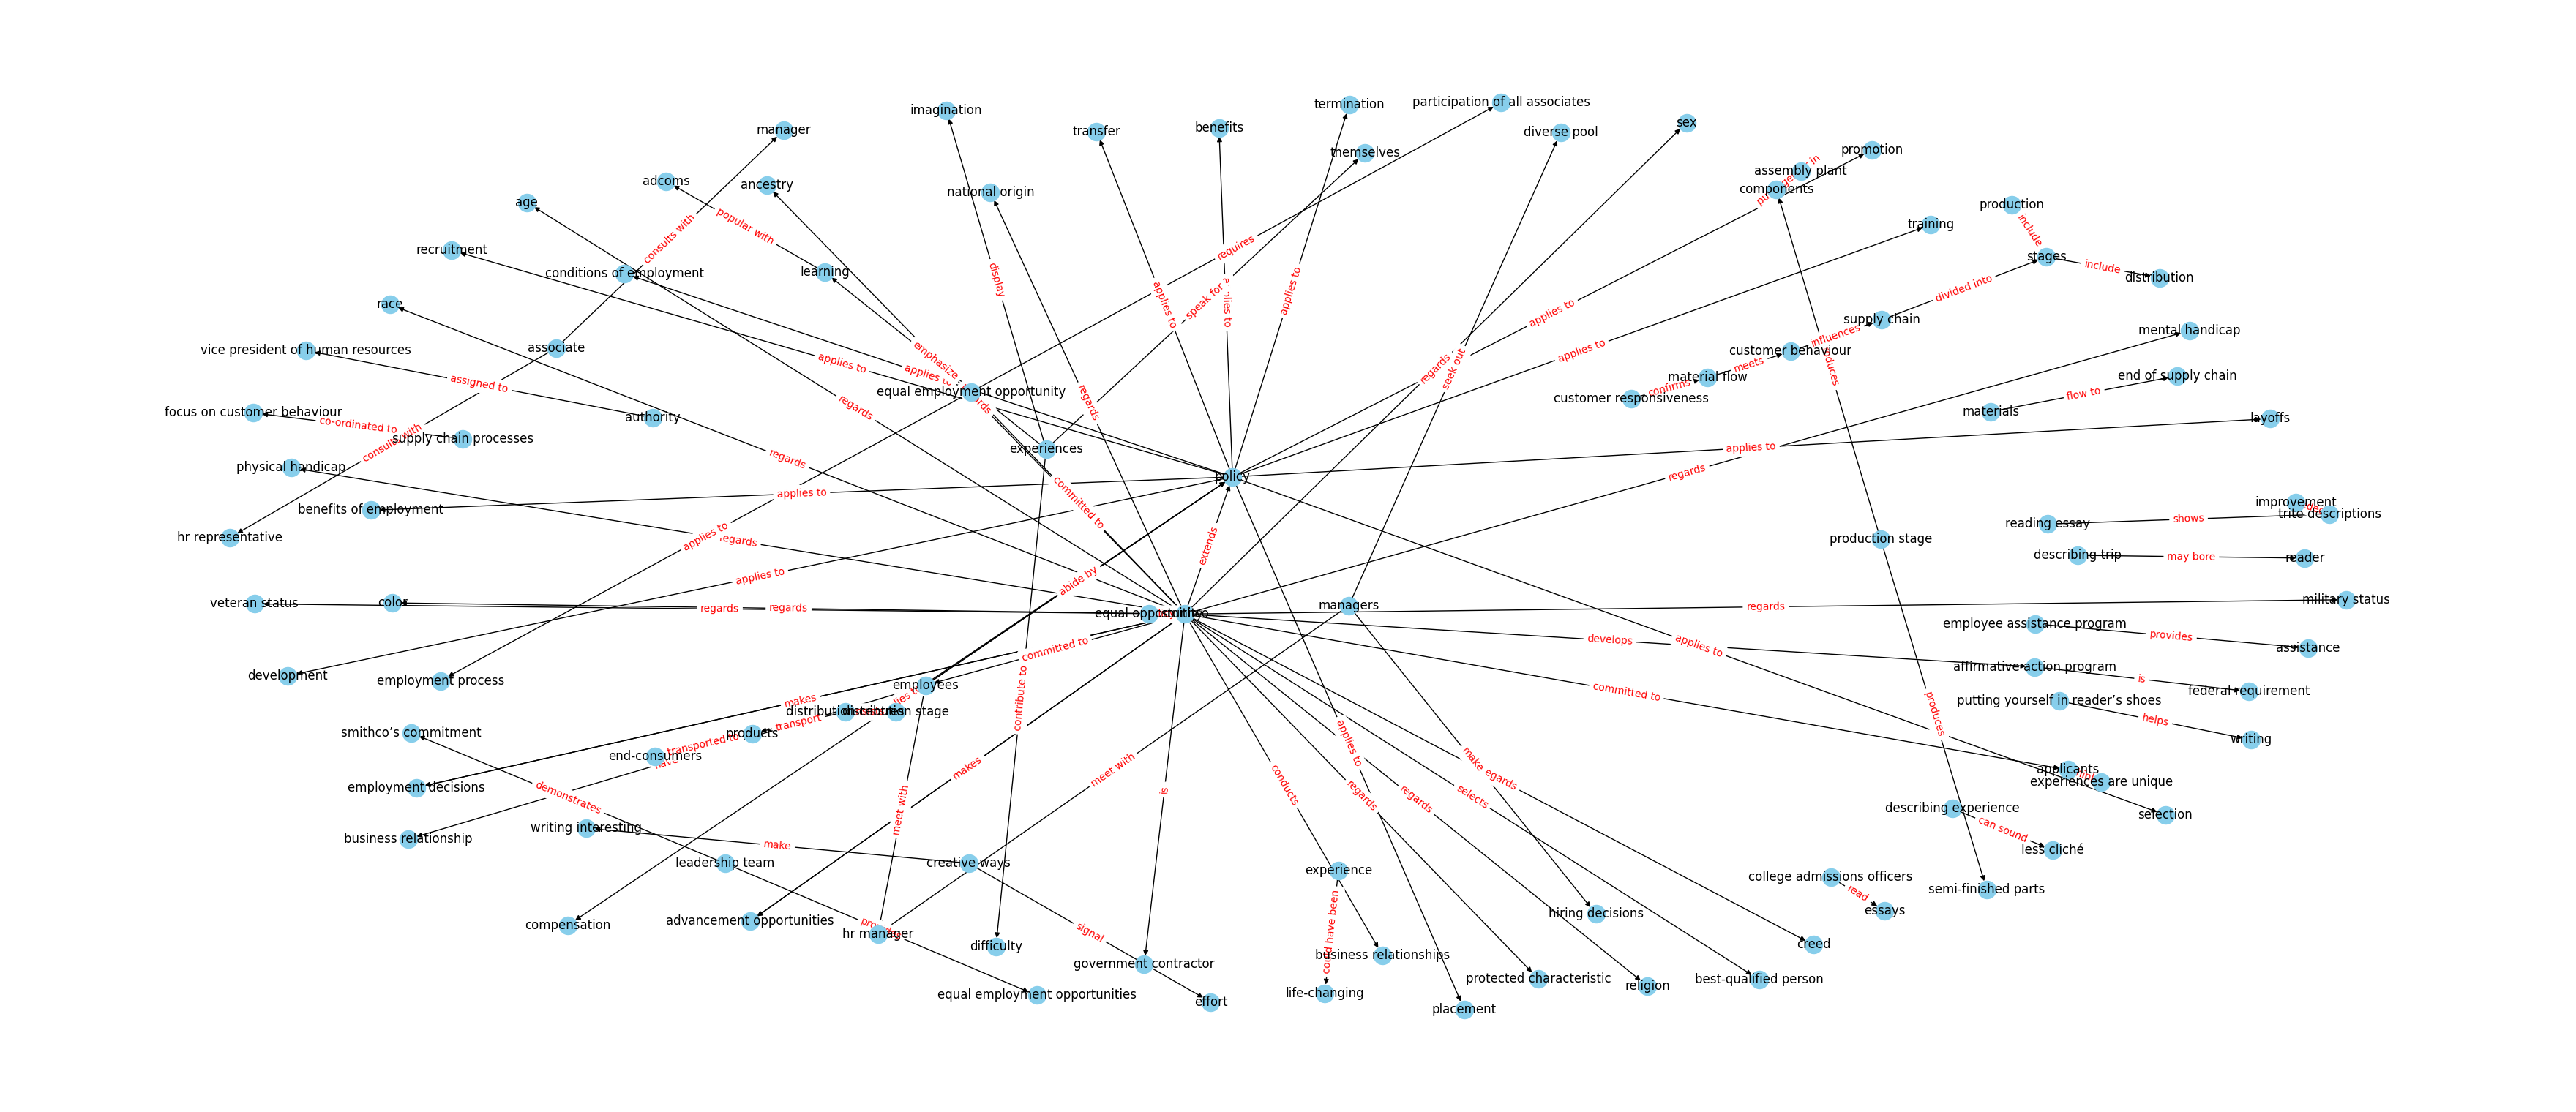

In [22]:
# Generating knowledge graph
G = nx.from_pandas_edgelist(KG_graph, "entity1", "entity2",
                            edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(35, 15))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
nx.draw_networkx_edge_labels(
  G,
  pos,
  edge_labels=rel_labels,
  font_color='red'
)

# download the image file of the knowledge graph
plt.savefig(r'___your__"final_graph.png"__location___') # find your "final_graph.png" image path and put it here

# show the image of the knowledge graph
plt.show()